EEG_Feature_2Hz
dict_keys(['__header__', '__version__', '__globals__', 'psd_movingAve', 'psd_LDS', 'de_movingAve', 'de_LDS'])
(17, 885, 25)
(17, 885, 25)
(17, 885, 25)
(17, 885, 25)
EEG_Feature_5Bands
dict_keys(['__header__', '__version__', '__globals__', 'psd_movingAve', 'psd_LDS', 'de_movingAve', 'de_LDS'])
(17, 885, 5)
(17, 885, 5)
(17, 885, 5)
(17, 885, 5)
EOG_Feature
dict_keys(['__header__', '__version__', '__globals__', 'features_table_ica', 'features_table_minus', 'features_table_icav_minh'])
(885, 36)
(885, 36)
(885, 36)
Forehead_EEG/EEG_Feature_2Hz
dict_keys(['__header__', '__version__', '__globals__', 'psd_movingAve', 'psd_LDS', 'de_movingAve', 'de_LDS'])
(4, 885, 25)
(4, 885, 25)
(4, 885, 25)
(4, 885, 25)
Forehead_EEG/EEG_Feature_5Bands
dict_keys(['__header__', '__version__', '__globals__', 'psd_movingAve', 'psd_LDS', 'de_movingAve', 'de_LDS'])
(4, 885, 5)
(4, 885, 5)
(4, 885, 5)
(4, 885, 5)
perclos_labels
dict_keys(['__header__', '__version__', '__globals__', 'perclos'])
(8

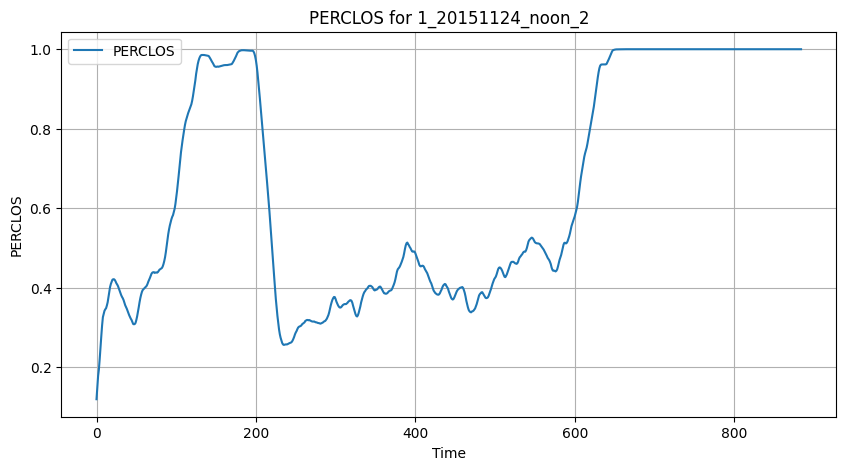

In [ ]:
from scipy.io import loadmat

dataset = "SEED-VIG"
participant = "1_20151124_noon_2"


data = loadmat(f"./{dataset}/EEG_Feature_2Hz/{participant}.mat")
print("EEG_Feature_2Hz")
print(data.keys())
print(data["psd_movingAve"].shape)
print(data["psd_LDS"].shape)
print(data["de_movingAve"].shape)
print(data["de_LDS"].shape)

data = loadmat(f"./{dataset}/EEG_Feature_5Bands/{participant}.mat", squeeze_me=True)
print("EEG_Feature_5Bands")
print(data.keys())
print(data["psd_movingAve"].shape)
print(data["psd_LDS"].shape)
print(data["de_movingAve"].shape)
print(data["de_LDS"].shape)

data = loadmat(f"./{dataset}/EOG_Feature/{participant}.mat", squeeze_me=True)
print("EOG_Feature")
print(data.keys())
print(data["features_table_ica"].shape)
print(data["features_table_minus"].shape)
print(data["features_table_icav_minh"].shape)

data = loadmat(
    f"./{dataset}/Forehead_EEG/EEG_Feature_2Hz/{participant}.mat", squeeze_me=True
)
print("Forehead_EEG/EEG_Feature_2Hz")
print(data.keys())
print(data["psd_movingAve"].shape)
print(data["psd_LDS"].shape)
print(data["de_movingAve"].shape)
print(data["de_LDS"].shape)

data = loadmat(
    f"./{dataset}/Forehead_EEG/EEG_Feature_5Bands/{participant}.mat", squeeze_me=True
)
print("Forehead_EEG/EEG_Feature_5Bands")
print(data.keys())
print(data["psd_movingAve"].shape)
print(data["psd_LDS"].shape)
print(data["de_movingAve"].shape)
print(data["de_LDS"].shape)

data = loadmat(f"./{dataset}/perclos_labels/{participant}.mat", squeeze_me=True)
print("perclos_labels")
print(data.keys())
print(data["perclos"].shape)
print(data["perclos"].dtype)

import matplotlib.pyplot as plt


def plot_perclos(data, participant):
    plt.figure(figsize=(10, 5))
    plt.plot(data["perclos"], label="PERCLOS")
    plt.title(f"PERCLOS for {participant}")
    plt.xlabel("Time")
    plt.ylabel("PERCLOS")
    plt.legend()
    plt.grid()
    plt.show()


plot_perclos(data, participant)


In [ ]:
import os
import pandas as pd


def read_participant_names(perclos_dir):
    participants = []

    for file_name in os.listdir(perclos_dir):
        if file_name.endswith(".mat"):
            participant_name = file_name.split(".")[0]
            participants.append(participant_name)

    df = pd.DataFrame(participants, columns=["Participant Name"])
    return df


perclos_dir = "SEED-VIG/perclos_labels"
participant_names = read_participant_names(perclos_dir)


In [ ]:
import os
import scipy.io
import pandas as pd
import numpy as np


def load_and_flatten(filepath, keys, num_channels=None, num_features=None):
    if os.path.exists(filepath):
        mat = scipy.io.loadmat(filepath)
        flattened = []
        for key in keys:
            if key in mat:
                data = mat[key]
                if data.ndim == 3:
                    data = np.transpose(data, (1, 0, 2)).reshape(885, -1)
                elif data.ndim == 2:
                    data = data
                flattened.append(data)
        return np.concatenate(flattened, axis=1)
    return np.zeros((885, 0))


def generate_column_names(prefix, num_channels, num_features):
    return [
        f"{prefix}_ch{ch+1}_feat{feat+1}"
        for ch in range(num_channels)
        for feat in range(num_features)
    ]


def load_single_user_data(participant_name, base_dir="SEED-VIG"):
    perclos_path = os.path.join(base_dir, "perclos_labels", f"{participant_name}.mat")
    eeg_2hz_path = os.path.join(base_dir, "EEG_Feature_2Hz", f"{participant_name}.mat")
    eeg_5bands_path = os.path.join(
        base_dir, "EEG_Feature_5Bands", f"{participant_name}.mat"
    )
    eog_path = os.path.join(base_dir, "EOG_Feature", f"{participant_name}.mat")
    forehead_2hz_path = os.path.join(
        base_dir, "Forehead_EEG", "EEG_Feature_2Hz", f"{participant_name}.mat"
    )
    forehead_5bands_path = os.path.join(
        base_dir, "Forehead_EEG", "EEG_Feature_5Bands", f"{participant_name}.mat"
    )

    perclos_data = load_and_flatten(
        perclos_path, ["perclos"], num_channels=1, num_features=1
    )
    eeg_2hz_data = load_and_flatten(
        eeg_2hz_path, ["psd_movingAve", "psd_LDS", "de_movingAve", "de_LDS"], 17, 25
    )
    eeg_5bands_data = load_and_flatten(
        eeg_5bands_path, ["psd_movingAve", "psd_LDS", "de_movingAve", "de_LDS"], 17, 5
    )
    eog_data = load_and_flatten(
        eog_path,
        ["features_table_ica", "features_table_minus", "features_table_icav_minh"],
        1,
        36,
    )
    forehead_2hz_data = load_and_flatten(
        forehead_2hz_path, ["psd_movingAve", "psd_LDS", "de_movingAve", "de_LDS"], 4, 25
    )
    forehead_5bands_data = load_and_flatten(
        forehead_5bands_path,
        ["psd_movingAve", "psd_LDS", "de_movingAve", "de_LDS"],
        4,
        5,
    )

    combined_data = np.hstack(
        [
            perclos_data,
            eeg_2hz_data,
            eeg_5bands_data,
            eog_data,
            forehead_2hz_data,
            forehead_5bands_data,
        ]
    )

    column_names = (
        ["perclos"]
        + generate_column_names("EEG_2Hz", 17, 25 * 4)
        + generate_column_names("EEG_5Bands", 17, 5 * 4)
        + generate_column_names("EOG", 1, 36 * 3)
        + generate_column_names("Forehead_EEG_2Hz", 4, 25 * 4)
        + generate_column_names("Forehead_EEG_5Bands", 4, 5 * 4)
    )

    df = pd.DataFrame(combined_data, columns=column_names)
    df["Participant Name"] = participant_name

    return df


In [ ]:
def load_all_participants(base_dir="SEED-VIG"):
    perclos_dir = os.path.join(base_dir, "perclos_labels")
    participant_names = read_participant_names(perclos_dir)["Participant Name"]

    all_data = pd.DataFrame()

    for participant_name in participant_names:
        print(f"Loading data for participant: {participant_name}")
        df = load_single_user_data(participant_name, base_dir)
        all_data = pd.concat([all_data, df], ignore_index=True)

    return all_data


all_participants_data = load_all_participants()
print(all_participants_data.head())


Loading data for participant: 21_20151016_noon
Loading data for participant: 20_20151129_night
Loading data for participant: 19_20151114_noon
Loading data for participant: 18_20150926_noon
Loading data for participant: 17_20150925_noon
Loading data for participant: 16_20151128_night
Loading data for participant: 15_20151126_night
Loading data for participant: 14_20151014_night
Loading data for participant: 13_20150929_noon
Loading data for participant: 12_20150928_noon
Loading data for participant: 11_20151024_night
Loading data for participant: 10_20151125_noon
Loading data for participant: 9_20151017_night
Loading data for participant: 8_20151022_noon
Loading data for participant: 7_20151015_night
Loading data for participant: 6_20151121_noon
Loading data for participant: 5_20151012_night
Loading data for participant: 5_20141108_noon
Loading data for participant: 4_20151107_noon
Loading data for participant: 4_20151105_noon
Loading data for participant: 3_20151024_noon
Loading data f

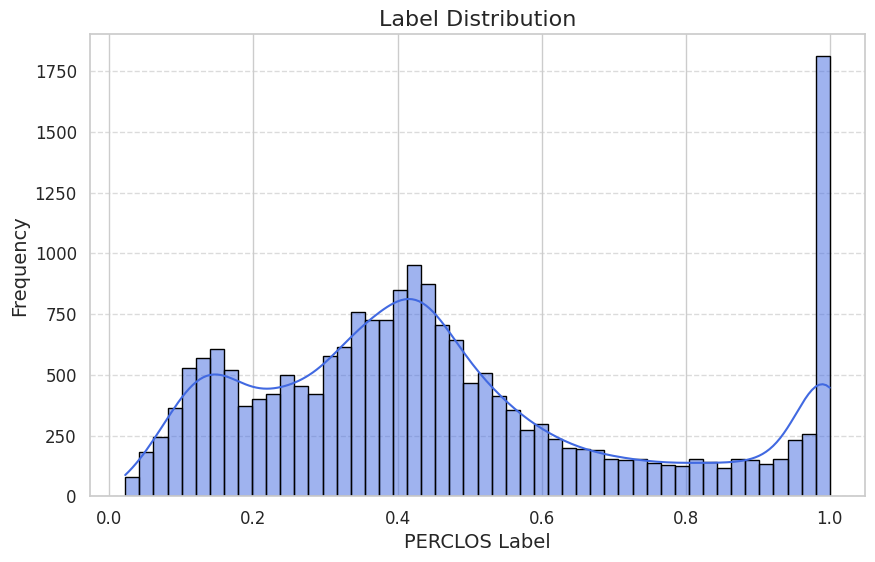

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_label_distribution(df, label_col="perclos"):
    sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
    plt.figure(figsize=(10, 6))
    sns.histplot(df[label_col], bins=50, kde=True, color="royalblue", edgecolor="black")
    plt.title("Label Distribution", fontsize=16)
    plt.xlabel("PERCLOS Label", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


plot_label_distribution(all_participants_data)


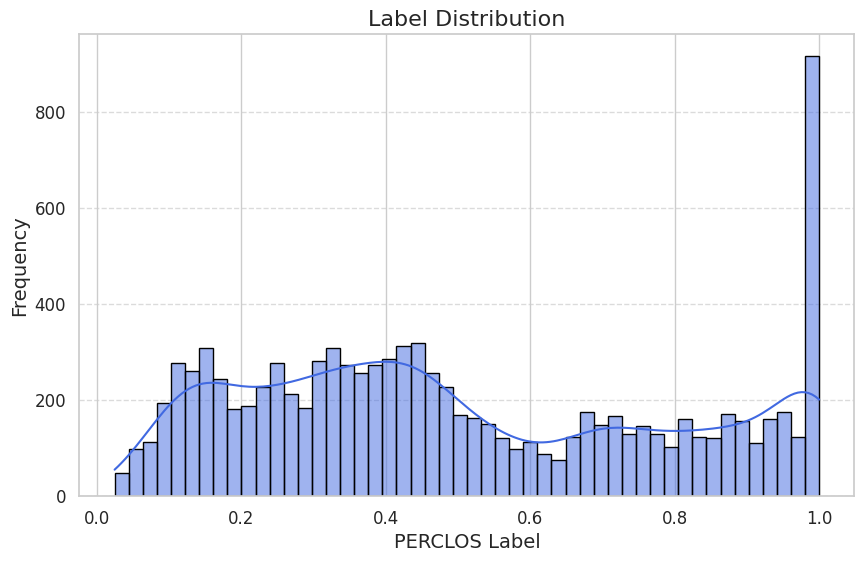

In [ ]:
from sklearn.utils import resample
import numpy as np


def make_uniform_distribution(df, label_col="quantized_perclos"):
    class_dfs = [df[df[label_col] == label] for label in df[label_col].unique()]
    min_count = min(len(class_df) for class_df in class_dfs)

    peak_df = df[(df["perclos"] >= 0.95) & (df["perclos"] <= 1.0)]
    drop_indices = np.random.choice(
        peak_df.index, size=len(peak_df) // 2, replace=False
    )
    df = df.drop(drop_indices)

    class_dfs = [df[df[label_col] == label] for label in df[label_col].unique()]
    min_count = min(len(class_df) for class_df in class_dfs)

    balanced_dfs = [
        resample(class_df, n_samples=min_count, random_state=42)
        for class_df in class_dfs
    ]
    balanced_df = (
        pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)
    )

    return balanced_df


balanced_data = make_uniform_distribution(all_participants_data)

plot_label_distribution(balanced_data)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

X_balanced = balanced_data.drop(
    columns=["perclos", "quantized_perclos", "Participant Name"]
)

cv_10fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200, class_weight="balanced", random_state=42
)

y_binary_balanced = (balanced_data["perclos"] > 0.5).astype(int)
y_binary_pred_balanced = cross_val_predict(
    rf_model, X_balanced, y_binary_balanced, cv=cv_10fold
)
print(
    "Binary Classification (10-Fold CV) Accuracy (Balanced Data):",
    accuracy_score(y_binary_balanced, y_binary_pred_balanced),
)


Binary Classification (10-Fold CV) Accuracy (Balanced Data): 0.9836759371221282


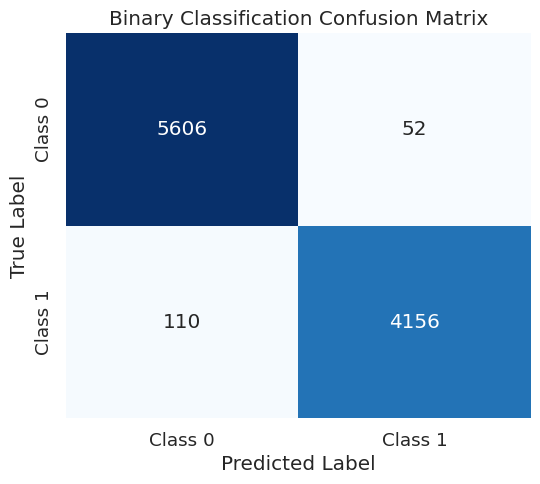

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_binary_confusion_matrix(y_true, y_pred):
    cm_binary = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_binary,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Class 0", "Class 1"],
        yticklabels=["Class 0", "Class 1"],
    )
    plt.title("Binary Classification Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


plot_binary_confusion_matrix(y_binary_balanced, y_binary_pred_balanced)


In [ ]:
y_ternary_balanced = balanced_data["quantized_perclos"]
y_ternary_pred_balanced = cross_val_predict(
    rf_model, X_balanced, y_ternary_balanced, cv=cv_10fold
)
print(
    "Ternary Classification (10-Fold CV) Accuracy (Balanced Data):",
    accuracy_score(y_ternary_balanced, y_ternary_pred_balanced),
)


Ternary Classification (10-Fold CV) Accuracy (Balanced Data): 0.97652156388553


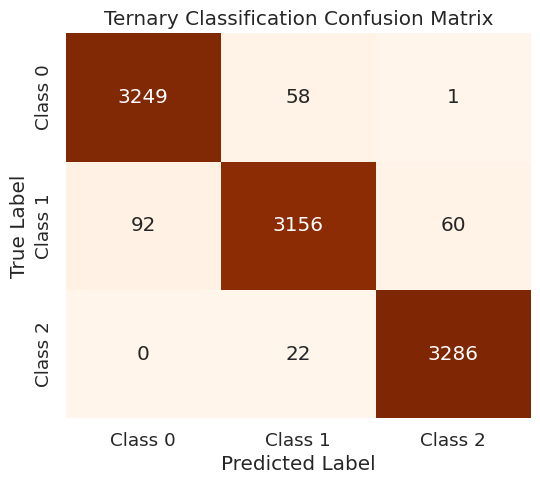

In [ ]:
def plot_ternary_confusion_matrix(y_true, y_pred):
    cm_ternary = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_ternary,
        annot=True,
        fmt="d",
        cmap="Oranges",
        cbar=False,
        xticklabels=["Class 0", "Class 1", "Class 2"],
        yticklabels=["Class 0", "Class 1", "Class 2"],
    )
    plt.title("Ternary Classification Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


plot_ternary_confusion_matrix(y_ternary_balanced, y_ternary_pred_balanced)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import accuracy_score

X = all_participants_data.drop(
    columns=["perclos", "quantized_perclos", "Participant Name"]
)
y_binary_encoded = (all_participants_data["perclos"] > 0.5).astype(int)
y_ternary_encoded = all_participants_data["quantized_perclos"]
groups = all_participants_data["Participant Name"]

cv_loso = GroupKFold(n_splits=len(groups.unique()))

rf_model = RandomForestClassifier(
    n_estimators=200, class_weight="balanced", random_state=42
)

y_binary_pred_loso = cross_val_predict(
    rf_model, X, y_binary_encoded, cv=cv_loso, groups=groups
)
y_ternary_pred_loso = cross_val_predict(
    rf_model, X, y_ternary_encoded, cv=cv_loso, groups=groups
)

print(
    "Binary Classification (LOSO CV) Accuracy:",
    accuracy_score(y_binary_encoded, y_binary_pred_loso),
)
print(
    "Ternary Classification (LOSO CV) Accuracy:",
    accuracy_score(y_ternary_encoded, y_ternary_pred_loso),
)
